In [1]:
#Importing Libraries
import numpy as np 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle as pkl

### Importing the data 
The data is imported and loaded using pandas and numpy methods below

In [2]:
#Importing data 
df = pd.read_csv("datafiles/Data.csv")

In [3]:
df.shape

(300, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source       300 non-null    object 
 1   Destination  300 non-null    object 
 2   Distance     295 non-null    float64
 3   Fuel Cost    295 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Source         0
Destination    0
Distance       5
Fuel Cost      5
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(295, 4)

In [7]:
df.describe()

,Distance,Fuel Cost
count,295.000000,295.000000
mean,1458.457664,10336.575620
std,820.655980,5816.262483
min,29.121000,206.390234
25%,809.747000,5738.946905
50%,1407.682000,9976.711561
75%,1992.999000,14125.048246
max,3547.261000,25140.621127


In [8]:
df[50:80]

,Source,Destination,Distance,Fuel Cost
52,East Sikkim,Chandrapur,1689.540,11974.333160
54,West Medinipur,Pudukkottai,1931.496,13689.155984
55,Darjeeling,Jehanabad,544.573,3859.570375
56,Fatehpur,Gurgaon,595.338,4219.358852
57,Nagapattinam,Rangareddy,642.807,4555.787478
58,Aligarh,Upper Subansiri,2339.540,16581.099827
59,Baramulla,North Dinajpur,2270.577,16092.336058
60,Rajauri,Karaikal,3226.177,22864.991791
61,Cuddalore,Bharatpur,2180.102,15451.109575
62,Gulbarga,Kohima,2778.202,19690.043641


In [9]:
df['Distance'].to_numpy()

array([1769.071, 1585.198,  550.592, 2854.314, 1344.634, 3166.656,
        823.409, 1646.833, 2039.039,  814.57 ,  828.69 , 1162.388,
       1820.537, 1284.434, 2126.618,  529.31 ,  330.536, 2535.554,
        956.693, 1968.112, 2044.173,  804.924, 1632.888, 1060.907,
       2576.708,   64.972, 2086.804, 1149.772, 1943.118, 1776.089,
       1758.991, 2416.213, 2399.73 ,  318.649, 1110.617, 2017.506,
       1905.6  , 1033.814, 1263.154, 1611.1  , 2581.813,  591.942,
        208.9  , 1122.099, 1056.763, 1222.878,  207.558, 1971.296,
        690.155,  605.93 , 1689.54 , 1931.496,  544.573,  595.338,
        642.807, 2339.54 , 2270.577, 3226.177, 2180.102, 2778.202,
         29.121, 1446.124, 2186.66 , 1059.83 , 1553.199,  648.426,
       1523.724, 1253.364,  611.381, 1088.803,  273.988,  772.007,
       1220.217,  654.766, 2221.559, 2651.665, 2579.838,  887.433,
       3113.291,  449.073,  746.015, 1951.508,  692.226,  755.094,
       2784.574,  548.886, 1407.682, 1337.435,  869.945, 2139.

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df['Distance'],df['Fuel Cost'],train_size=0.75)

In [13]:
X_train, X_test = X_train.to_numpy(),X_test.to_numpy()
y_train,y_test = y_train.to_numpy(),y_test.to_numpy()


## Normalize/Scale the Data

In [14]:
#### This cell has been added at the end as to emphasize the importance of Normalisiing the data ######
#Before Fitting to the model , we need to reshape the data
X_train_shape = X_train.reshape((-1,1))

#Calculating mean and standard deviation for single data points
mean,sigma = np.mean(X_train),np.std(X_train)
#Normalise the data 
scale = StandardScaler()
X_train_norm = scale.fit_transform(X_train_shape)
X_train_norm.shape
# X_train_shape


(221, 1)

## Apply the gradient Descent 
SGDRegressor is used to apply the gradient descent

In [15]:

#Training our model by fitting to the linear model
gradient_descent = SGDRegressor(max_iter=1000)
gradient_descent.fit(X_train_norm,y_train)

SGDRegressor()

In [16]:
#Extracting weights and bias from gradient Descent 
w_norm = gradient_descent.coef_
b_norm = gradient_descent.intercept_
print(f"The weights and the bias would be w : {w_norm} and b : {b_norm} respectively")

The weights and the bias would be w : [5874.71514281] and b : [10322.45490027] respectively


## Predict the data

In [17]:
#Predicting the data 
y_pred = gradient_descent.predict(X_train_norm)


### Measuring Accuracy for Training Data

In [18]:
#Measuring the accuracy 
# model evaluation for training set

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for training set
--------------------------------------
MAE is 0.48544612137109894
MSE is 0.34481458910512147
R2 score is 0.9999999900109269
Accuracy : 99.999999%


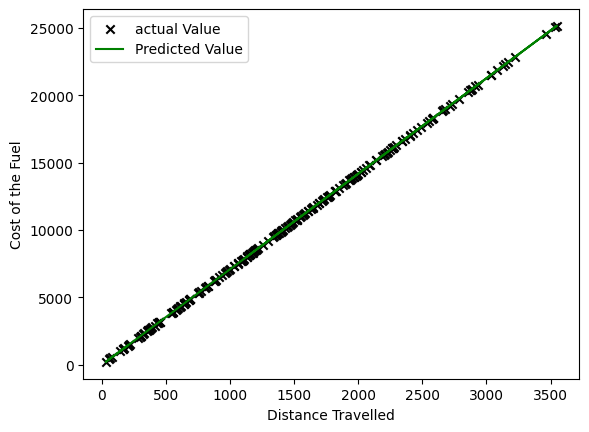

In [19]:
# print(X_train,y_train,y_pred,sep=" ")
plt.scatter(X_train,y_train,marker='x',c='black',label='actual Value')
plt.plot(X_train,y_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

In [20]:
#Predicting for a new value
X_test_new = X_test.reshape((-1,1))
# X_test_norm = scale.fit(X_test_new)
X_test_norm = scale.transform(X_test_new)
# print(X_test_norm[:10])

### Computating Z_Score normalisation instead of scale.transform() for better accuracy #####

# X_test_norm = (X_test_new - mean) / sigma
# print(X_test_new)
y_test_pred = gradient_descent.predict(X_test_norm)

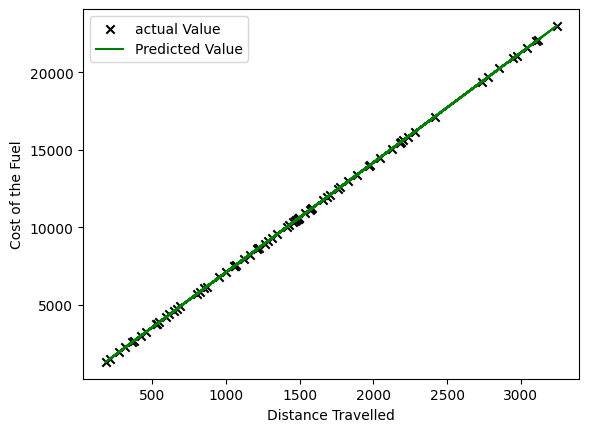

In [21]:
# print(X_test,y_test,y_pred,sep=" ")
plt.scatter(X_test,y_test,marker='x',c='black',label='actual Value')
plt.plot(X_test,y_test_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

### Measuring the accuracy for testing Data

In [22]:
# model evaluation for testing set

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for testing set
--------------------------------------
MAE is 0.44385671778980246
MSE is 0.31278693027884447
R2 score is 0.9999999900093325
Accuracy : 99.999999%


In [23]:
#Save And Load the model

modelName = "fuel_model.pkl"
pkl.dump(gradient_descent,open("datafiles/" + modelName,'wb'))

scalerName = "scale.pkl"
pkl.dump(scale,open("datafiles/" + scalerName,'wb'))

In [28]:
model = pkl.load(open("datafiles/" + modelName,'rb'))
scale = pkl.load(open("datafiles/" + scalerName,'rb'))
# model.predict(scale.transform([[1]]))
# model.predict([[]])
# model.predict(scale.transform(np.array(20).reshape(1,-1)))

array([142.76257473])